### Data preparation & understanding
Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

loading dataset into program

In [2]:
df = pd.read_csv('data.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


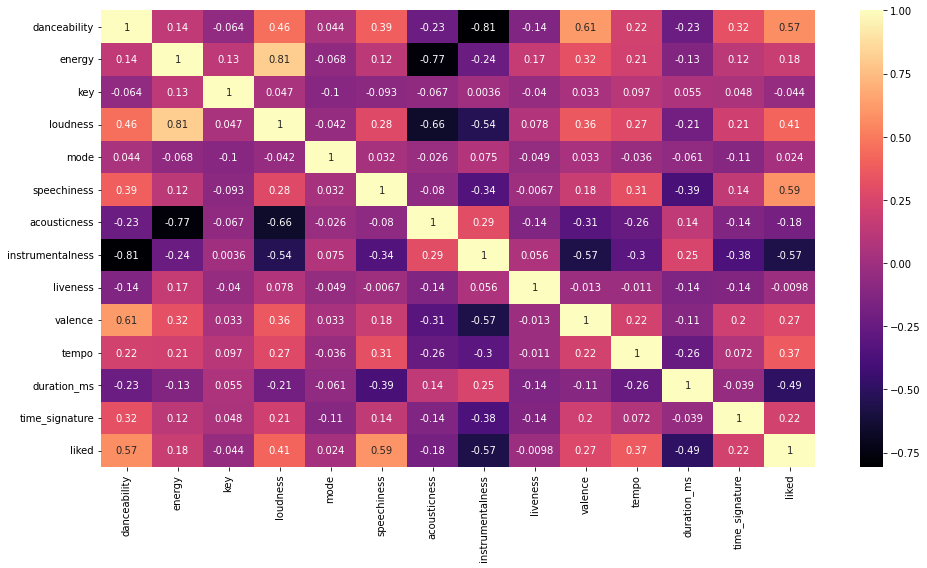

In [3]:
pd.options.display.max_columns = 50
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, cmap='magma')
plt.tight_layout()
plt.show()

Removing columns that won't be useful in our model
(time_signature, duration_ms)

In [4]:
df.drop('duration_ms', axis = 1, inplace = True)
df.drop('time_signature', axis = 1, inplace = True)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  liked             195 non-null    int64  
dtypes: float64(9), int64(3)
memory usage: 18.4 KB


as we see all of the data is empty of nulls and it is all numerical
so that's it for setting up our data frame to work on

In [6]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,1


### Model:

for the spotify recommendation system we will try using K-nearest neighbor and Logistic regression and we will compare between them to see which is better

Splitting the data into training (80%) and testing (20%)

In [7]:
from sklearn.model_selection import train_test_split
x = df.drop('liked', axis = 1)

y = df.liked
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((156, 11), (156,), (39, 11), (39,))

Creating the KNN model

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_test,y_test)*100

87.17948717948718

In [9]:
gbc_model = KNeighborsClassifier().fit(x_train, y_train)
from sklearn.metrics import classification_report
y_pred_gbc = gbc_model.predict(x_test)
print('Classification Report: (K-Nearest Neighbor)')
print(classification_report(y_test, y_pred_gbc))

Classification Report: (K-Nearest Neighbor)
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        14
           1       0.95      0.84      0.89        25

    accuracy                           0.87        39
   macro avg       0.86      0.88      0.87        39
weighted avg       0.89      0.87      0.87        39



Creating the Logistic regression model

In [10]:
from sklearn.linear_model import LogisticRegression
lReg = LogisticRegression(max_iter = 10000)
lReg.fit(x_train, y_train)
lReg.score(x_test,y_test)*100

89.74358974358975

In [11]:
gbc_model = LogisticRegression(max_iter = 10000).fit(x_train, y_train)
from sklearn.metrics import classification_report
y_pred_gbc = gbc_model.predict(x_test)
print('Classification Report: (Logistic Regression)')
print(classification_report(y_test, y_pred_gbc))

Classification Report: (Logistic Regression)
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.96      0.88      0.92        25

    accuracy                           0.90        39
   macro avg       0.88      0.90      0.89        39
weighted avg       0.90      0.90      0.90        39



As a conclusion: it is shown that logistic regression is clearly a better choice in this model